# 👋 **Final Research Project**
Project Number: 5

Name: Winsome Tang

Student Number: 991586467

Course: INFO40975 Artificial Intelligence

# 💻 Installation

In [ ]:
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!unzip -q wine+quality.zip

replace winequality-red.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace winequality-white.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace winequality.names? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 57.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4

# 🚀 Quick start

In [ ]:
import pycaret
import pandas as pd
from pycaret.regression import *
pycaret.__version__

'3.3.2'

### ➡️ Setup your dataset

In [ ]:
from pycaret.datasets import get_data
data = pd.read_csv('winequality-red.csv', sep=';')
print(data.head)
print(data.shape[0])  # Rows from PyCaret dataset

<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067  

In [ ]:
# import pycaret regression and init setup
s = setup(data, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 12)"
4,Transformed data shape,"(1599, 12)"
5,Transformed train set shape,"(1119, 12)"
6,Transformed test set shape,"(480, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


### ➡️ Compare Models

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3321,0.2393,0.4873,0.7818,0.0415,0.0316,2.3320
lightgbm,Light Gradient Boosting Machine,0.3502,0.2694,0.5169,0.7527,0.0440,0.0333,0.5830
xgboost,Extreme Gradient Boosting,0.3435,0.2771,0.5247,0.7448,0.0447,0.0325,0.1420
et,Extra Trees Regressor,0.3445,0.2801,0.5276,0.7440,0.0450,0.0327,0.3130
rf,Random Forest Regressor,0.3759,0.2946,0.5408,0.7301,0.0462,0.0358,0.7810
gbr,Gradient Boosting Regressor,0.3995,0.2965,0.5430,0.7294,0.0464,0.0381,0.1890
lr,Linear Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.6810
lar,Least Angle Regression,0.4532,0.3609,0.5971,0.6691,0.0517,0.0434,0.0240
ada,AdaBoost Regressor,0.5605,0.4679,0.6825,0.5726,0.0591,0.0543,0.1380
dt,Decision Tree Regressor,0.4763,0.5556,0.7433,0.4873,0.0635,0.0450,0.0310


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
best = create_model(best) #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2868,0.1678,0.4096,0.8057,0.0367,0.0283
1,0.3843,0.3046,0.5519,0.7041,0.0474,0.0364
2,0.3474,0.2310,0.4806,0.8065,0.0420,0.0335
3,0.3582,0.2663,0.5160,0.7975,0.0443,0.0343
4,0.2916,0.1924,0.4386,0.7837,0.0371,0.0276
5,0.3278,0.2523,0.5023,0.7893,0.0411,0.0301
6,0.3042,0.2934,0.5417,0.7346,0.0432,0.0280
7,0.3499,0.2352,0.4850,0.8103,0.0413,0.0332
8,0.3093,0.2012,0.4486,0.7786,0.0388,0.0297


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### ➡️ Analyze Model

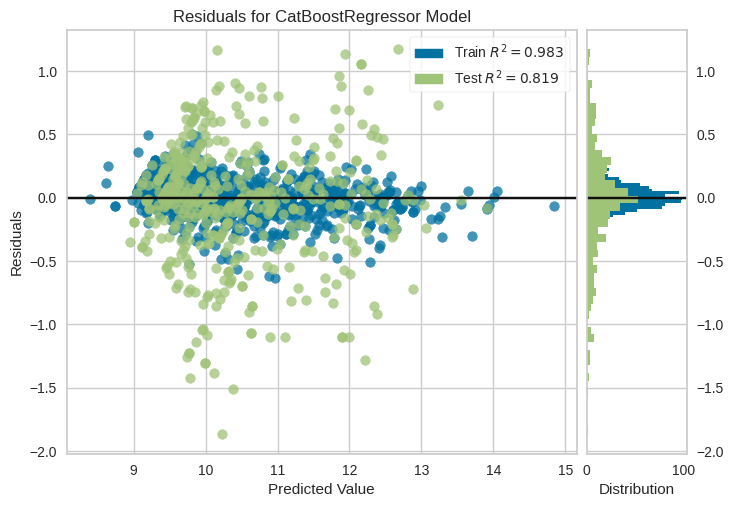

In [ ]:
plot_model(best, plot = 'residuals')

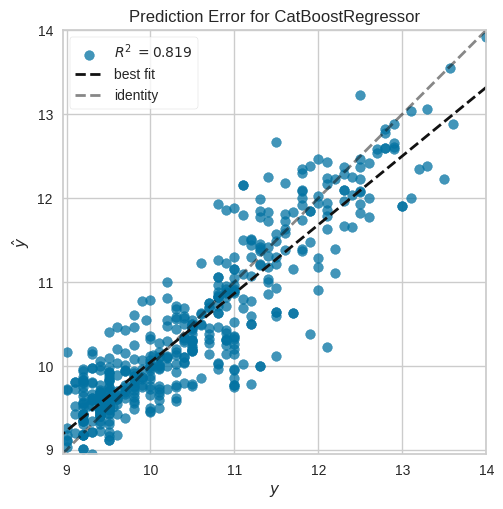

In [ ]:
# plot error
plot_model(best, plot = 'error')

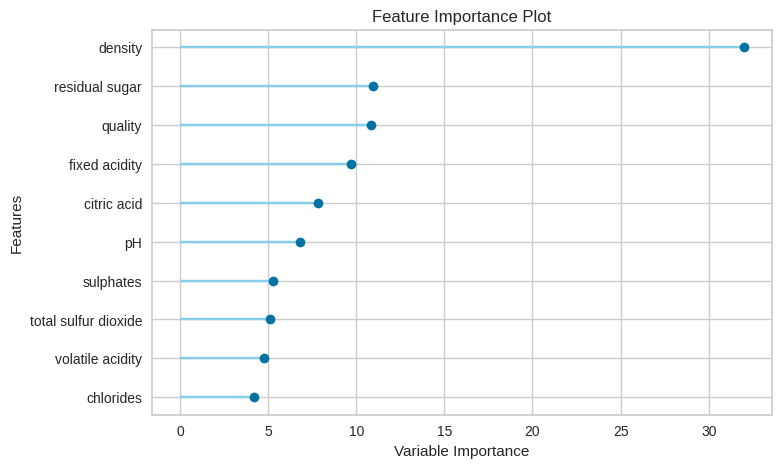

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### ➡️ Prediction

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3339,0.2136,0.4622,0.8188,0.0396,0.0315


In [ ]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,4.0,8.0,0.99674,3.33,0.62,6,12.2,11.395583
772,9.5,0.57,0.27,2.3,0.082,23.0,144.0,0.99782,3.27,0.55,5,9.4,9.618191
1037,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,5,9.2,9.351609
1106,8.2,0.23,0.42,1.9,0.069,9.0,17.0,0.99376,3.21,0.54,6,12.3,11.963622
263,7.9,0.37,0.23,1.8,0.077,23.0,49.0,0.99630,3.28,0.67,5,9.3,9.798311


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.6743,0.7754,0.8806,0.4548,0.0756,0.0661


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,type,alcohol,prediction_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,red,9.4,9.433343
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,5,red,9.8,9.661195
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,5,red,9.8,9.762821
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,6,red,9.8,9.898262
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,5,red,9.4,9.433343


### ➡️ Save Model

In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'free sulfur dioxide',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x7dd8a0348cd0>)

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'free sulfur dioxide',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x7dd8120a8340>)])